<h1>Oración 1: Gurgeh y Yay juegan juegos violentos.</h1>

In [1]:
import nltk
import re

In [5]:
# Recursive Descent Parser

def rd_parser(oracion, gramatica):                  # Definimos una función llamada rd_parser con dos argumentos.
    oracion = oracion.lower()                       # Convertimos a minúscula la oración utilizando una función nativa de la cadena de caracteres: lower(). 
        
    if oracion.endswith('.'):                       # Otra función nativa de las strings nos ayuda a chequear si la cadena termina en x argumento.
        oracion = re.sub('\.',' ',oracion)          # En este caso, si la oración termina con un punto, se lo quita utilizando la librería de expresiones regulares "re".
    else:                                           # Si no termina con un punto, 
        oracion = oracion                           # toma la oración como estaba originalmente.
    lista_palabras = oracion.split()              # Dividimos la oración en palabras tomando como separador el espacio en blanco  con otra función nativa de las strings: split.
    #print("- Esta es la lista de palabras resultante: ", lista_palabras) # Split nos devuelve una lista (ordenada) de strings.
      
    gramatica = nltk.data.load(gramatica, cache=False)           # Usamos la función de la sub librería "data" que nos permite cargar una gramática para que pueda ser usada luego por el parser.    
    rd_parser = nltk.RecursiveDescentParser(gramatica) # Instanciamos la clase del parser que nos da NLTK pasandole un argumento obligatorio: la gramática.
    for arbol in rd_parser.parse(lista_palabras):    # Una vez que instanciamos la clase, podemos usar sus funciones mientras le pasemos los argumentos requeridos. En este caso, usamos la función "parser" a la que le pasaremos nuestra lista de palabras, y la función nos devolverá cada árbol posible en mi gramática para esa oración.
        #print("- Este es el árbol resultante: ", arbol.draw()) # Imprimimos cada árbol en la consola.
        return(arbol)

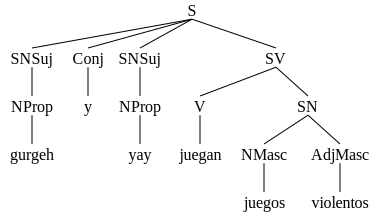

In [6]:
oracion1 = 'Gurgeh y Yay juegan juegos violentos'                                    
gramatica = 'gramaticas/CFG_1.cfg'                       
rd_parser(oracion1, gramatica)                         

Desde el punto de vista gramatical, tanto _Gurgeh_ y _Yay_ como _juegos violentos_ constituyen un sintagma nominal. Sin embargo, en nuestra regla de reescritura nos vimos forzados a declarar dos elementos terminales distintos (```S -> SNSuj Conj SNSuj SV``` y luego ```SV -> V SN```), para evitar casos de sobregeneración como _*Amigos juegan juegos violentos_, ya que el nombre desnudo plural puede aparecer como objeto pero no como sujeto. Así, ```SNSuj``` sólo podrá reescribirse como un nombre propio ```SNSuj -> NProp```, como un pronombre personal (```SNSuj -> PROP```) o como un sustantivo precedido por un pronombre demostrativo o posesivo átono que lo legitime en posición de sujeto (```SNSuj -> PronMasc NMasc```, ver oración 4).

Más aún: dado que se trata de una gramática independiente del contexto, para modelar la concordancia de género (_juegos violentos_) no queda más opción que crear un elemento preterminal distinto para los nombres masculinos (```NMasc```) y femeninos (```NFem```), ya que, de otro modo, tendríamos oraciones como _*Gurgeh y Yay juegan juegos falsas_. Una vez más nos vemos obligados a desechar ciertas generalizaciones, ya que para nuestra gramática no hay ninguna semejanza entre dos sustantivos como _juegos_ y _armas_. Además, esto repercute negativamente en la implementación computacional, ya que se vuelve necesario elaborar nuevas reglas de reescritura para el ```SN```. 